# Theoretischer Hintergrund
Mithilfe von Natural Language Processing und Sentiment Analysis wird es Maschinen ermöglicht, menschliche Emotionen zu verstehen. Gerade für Unternehmen ist es wichtig, die allgemeine Wahrnehmung von Events (zum Beispiel der Launch eines neuen Produktes) zu verfolgen. Durch Echtzeit-Zugriff und die hohe Verfügbarkeit der Inhalte auf Twitter, Facebook oder anderen sozialen Netzwerken, können verschiedene Analysen der Posts durchgeführt werden.

## Natural Language Processing
Natural Language Processing (NLP) befasst sich mit der Verarbeitung großer Mengen natürlicher Sprache. Die Herausforderung besteht darin, dass Menschen unterschiedlich miteinander kommunizieren. Manchmal verwenden wir lange Sätze, manchmal kurze Sätze und manchmal wiederholen wir uns. Manchmal gibt es mehrere Wege, den gleichen Inhalt zu vermitteln, manchmal verwenden wir Synonyme.
Im nachfolgenden Kapitel wird gezeigt, wie man einfache Wortanalysen machen kann.

### Natural Language Toolkit
Um Beispiele durchzuführen, werden wir das Natural Language Toolkit ([NLTK](http://www.nltk.org/)) verwenden. Es ist standardmäßig in  Anaconda enthalten. Abgesehen vom Import des Toolkits müssen keine weiteren Schritte unternommen werden.

In [1]:
import nltk

##### Daten einlesen
Um eine *Internetquelle* zu verwenden, führt man den folgenden Code aus:
```Python
from urllib import request
url = "http://url.com"
response = request.urlopen(url)
raw = response.read().decode('utf8')
tokens = nltk.tokenize.word.tokenize(raw)
tokens = nltk.Text(tokens)
```

Um eine *lokale Datei* einzulesen, geht man wie folgt vor:

```Python
file = open("./filename.txt", 'r')
inputfile = file.read()
tokens = nltk.tokenize.word_tokenize(inputfile)
tokens = nltk.Text(tokens)```

Wir verwenden zunächst einige Testdatensätze, welche durch den Befehl `nltk.download()` heruntergeladen werden können. Im Popup Fenster kann man aussuchen, welche Datensätze heruntergeladen werden sollen. Für das nachfolgende Beispiel verwenden wir die Datensätze des `book` Pakets.

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

![NLTK-Downloader mit allen verfügbaren Datensätzen](NLTK_Downloader.png)
*Der NLTK-Downloader mit allen verfügbaren Datensätzen. Zum Herunterladen kann man das entsprechende Paket einfach doppelklicken. Wenn man fertig ist, kann man den Downloader über `File > Exit` verlassen.*

Nachdem die Pakete heruntergeladen wurden, können wir sie benutzen. Zuerst importieren wir die Bücher:

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Wenn die Texte erfolgreich eingelesen wurden, erhält man gleichzeitig eine Übersicht der geladenen Daten.

Man kann einen Text mit dem Befehl `concordance(str)` nach einem bestimmten Wort durchsuchen. Beispielsweise durchsuchen wir `text1` (Moby Dick) nach dem Wort *monstrous*:

In [4]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


Die Methode `concordance()` gibt uns nun alle Passagen an, in denen das gesuchte Wort vorkommt. Es ist interessant zu sehen, dass das gleiche Wort je nach Kontext verschiedene Bedeutungen haben kann.

Im gleichen Zuge könnten Synonyme von *monstrous* in anderen Passagen verwendet worden sein, die für uns auch von Interesse wären. Dafür gibt es die Methode `similar()`: 

In [5]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [6]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


Hier kann man klar erkennen, dass *monstrous* in Text 1 (Moby Dick) eher als negatives Wort verwendet wurde, wohingegen Text 2 es als eher positives Wort verwendet.

Man kann auch nach einem gemeinsamen Kontext zwischen 2 oder mehreren Wörtern suchen. Dabei ist es schlau, sich vorher die ähnlichen Wörter mit Hilfe des `similar` Befehls anzuschauen. Im nachfolgenden Beispiel suchen wir nach einem ähnlichen Kontext zwischen *monstrous* und *exceedingly* in Text 2. Dafür verwenden wir die Methode `common_contexts()`:

In [7]:
text2.common_contexts(["monstrous", "exceedingly"])

be_glad is_fond


Als Ergebnis erhalten wir die beiden Verben *to be glad* und *to be fond*

Neben der Analyse einzelner Wörter und deren Bedeutungen, können wir mit dem Toolkit auch den Ort der Wörter bestimmen. Nachfolgend finden Sie ein Beispiel mit den Wörtern *whale*, *monstrous* und *captain*. Die X-Achse stellt dabei die Länge (in Wörtern) des gesamten Textes dar und die vertikalen Striche eine Verwendung des entsprechenden Wortes:

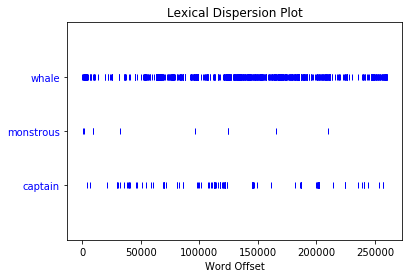

In [8]:
text1.dispersion_plot(["whale", "monstrous", "captain"])

Da die Texte sich in einem Array befinden, können wir mit Hilfe des `len()` Befehls die Länge des Textes in *Tokens* ausgeben lassen. Ein Token ist eine einzigartige Verkettung von Zeichen, also bildet sowohl jedes einzigartige Wort ein Token, als auch jedes einzigartige Satzzeichen.

In [9]:
len(text1)

260819

Mit dem Befehl `set` wird uns jedes Token nur einmal ausgegeben. Mit Hilfe von `sorted()` und `len()` können wir das Set sortieren lassen und die Anzahl der verschiedenen Tokens zählen lassen.

In [10]:
#set(text1)

{'unforseen',
 'Cleveland',
 'REPEATED',
 'presuming',
 'roomy',
 'skewers',
 'GREENLAND',
 'hang',
 'advised',
 'numerous',
 'shouting',
 'credulities',
 'honeycombs', [...]

In [11]:
#sorted(set(text1))[:10]

['!',
 '!"',
 '!"--',
 "!'",
 '!\'"',
 '!)',
 '!)"',
 '!*',
 '!--',
 '!--"',
 "!--'",
 '"',
 '"\'',
 '"--',
 '"...', [...]

In [12]:
len(set(text1))

19317

Indem wir die Anzahl der Tokens durch die Gesamtlänge des Textes teilen, können wir herausfinden wie divers die Wortvielfalt des Textes ist. Bei Moby Dick sind 7,4% der Wörter einzigartig, was bedeutet dass jedes Wort im Schnitt 13-14 Mal im Text vorkommt.

In [13]:
len(set(text1)) / len(text1)

0.07406285585022564

Mit dem `count()` Befehl können wir die Anzahl eines bestimmten Tokens im Text ausgeben lassen.

In [14]:
text1.count("whale")

906

Es wäre noch interessant zu wissen, welche Tokens am häufigsten/seltensten verwendet werden. Das kann man über die *Frequency Distribution* herausfinden:

In [15]:
fdist = FreqDist(text1)

In [16]:
print(fdist)

<FreqDist with 19317 samples and 260819 outcomes>


In [17]:
fdist.most_common(15)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124)]

In [18]:
fdist.most_common()[-15:]

[('ONLY', 1),
 ('ESCAPED', 1),
 ('THEE', 1),
 ('halfspent', 1),
 ('suction', 1),
 ('closing', 1),
 ('Ixion', 1),
 ('Till', 1),
 ('liberated', 1),
 ('Buoyed', 1),
 ('dirgelike', 1),
 ('padlocks', 1),
 ('sheathed', 1),
 ('retracing', 1),
 ('orphan', 1)]

**Notiz:** Es gibt keine `least_common()` Funktion, jedoch gibt die Funktion `most_common` einen sortierten Array zurück, bei dem man sich einfach die X letzten Ergebnisse ausgeben lassen kann. Über diesen Umweg kann man sich die am seltensten verwendeten Tokens trotzdem anzeigen lassen.

Neben der Funktion, die häufigsten Wörter als Text auszugeben, bietet Frequency Distribution auch die Möglichkeit, einen Graphen mit den häufigsten X Wörtern auszugeben:

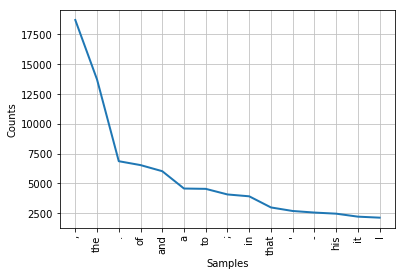

In [19]:
fdist.plot(15)

*Collocations* sind Wortsequenzen, die unverhältnismäßig oft miteinander verwendet werden. Eine ihrer Charakteristiken ist, dass sie normalerweise nicht austauschbar sind. Beispiel: *roter Wein* kann nicht durch *bordeauxroter Wein* ersetzt werden. Mithilfe des NLTK kann man sich auch eine Liste von collocations ausgeben lassen.

In [20]:
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


In [21]:
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties


## Sentiment Analysis
Sentiment (deutsch: Stimmung/Empfindung) Analysis, oder auch Opinion Mining genannt, ist eine Methode, mit welcher man versucht, die Stimmung einer Aussage oder die Emotionen dahinter zu bewerten. Die Aussage ist dabei weder an eine bestimmte Sprache gebunden, noch muss sie von einer bestimmten Quelle stammen. Man kann beispielsweise Tweets, Facebook Posts, Chatverläufe oder SMS verwenden. Im Gegensatz zum Natural Language Processing werden nicht nur die Wörter bewertet, sondern die allgemeine Stimmung dahinter analysiert. Anhand der Wortwahl oder Zeichensetzung kann man erkennen, ob jemand genervt ist. 

Beispiele:

Satz                                                                         | Aussage 
---------------------------------------------------------------------------- | --------
Visiting to the wonderful places in Europe. Feeling real happy               | Positiv 
I love little sunshine in winters, make me feel live                         | Positiv 
I am stuck in a same place, feeling sad                                      | Negativ 
The cab driver was a nice person. Think many of them are actualy good people | Positiv 

Sentiment Analysis spielt eine wichtige Rolle, um die Kundenresonanz zu verstehen und kann den Wachstum eines Unternehmens stark beeinflussen. Mit Social Media Plattformen wie Facebook oder Twitter ist das Sprichwort *die Feder ist mächtiger als das Schwert* gegenwärtiger denn je. Mundpropaganda gilt als eines der stärksten Marketingmethoden, wodurch das Bedürfnis entstanden ist, Sentiment Analysen durchzuführen.
Das Feld ist inzwischen so fortgeschritten, dass man Ergebnisse größerer Wahlen durch Sentiment Analysen der Wähler ziemlich genau vorhersagen kann. Auf die gleiche Weise werden Entwicklungen des Aktienmarktes durchgeführt. 

### Schritte der Sentiment Analyse
Eine Meinung oder eine Stimmung kann einem Computer als Quintupel beschrieben werden.

**Quintupel**: ein 5-dimensionales Objekt mit den folgenden Achsen:
* $O$ beschreibt das *zu überprüfende Objekt*. Es wird durch named-entity recognition (Methode zur automatischen Identifizierung von Eigennamen) identifiziert (Beispiel: Barrack Obama; Volkswagen Golf)
* $f$ ist ein *Feature* von $O$. Es wird durch Datenverarbeitungsverfahren evaluiert
* $h$ ist der *information miner*
* $t$ ist der Zeitpunkt der Datenextraktion
* $SO$ ist die *Sentiment Orientation* des Information Miners $h$ mit dem Feature $f$ im Bezug auf das Objekt $O$  zum Zeitpunkt $t$. Der Wert der Sentiment Orientation ist entscheidend dafür, ob ein Objekt als positiv oder negativ eingestuft wird.

Um den Sentiment Value $SO$ zu berechnen, werden die folgenden Schritte durchgeführt:
1. Part-of-speech tagging (pos) bedeutet die Zuordnung von Wörtern oder Satzzeichen eines Objektes zu Wortarten. Hierbei werden sowohl  Definitionen des Wortes, als auch der Kontext berücksichtigt. Zur Durchführung werden Machine Learning Algorithmen verwendet. Eine Liste der verfügbaren Tags kann [hier](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) gefunden werden.
2. Wir betrachten die (SO) der gesammelten Objekte. Beispielsweise wurde *hervorragend* und *Handy* gesammelt, also eine positive Reaktion. Das Gegenteil könnte *schlechtes* + *Handy* sein. In dieser Phase versucht das System, die Begriffe einzuordnen.
3. Die durchschnittliche Sentiment Orientation aller Begriffe wird zusammengerechnet, um beispielsweise folgende Aussagen zu treffen:
    1. "Normalerweise mögen Leute ihr neues Handy." → **positiv**
    2. "Normalerweise hassen Leute ihr neues Handy." → **nicht positiv**

**Zusatz:**
[SentiWordNet](http://sentiwordnet.isti.cnr.it/) ist eine Ressource des Opinion Minings, die die Sentiment Values eines englischen Datensatzes nach Positivität, Negativität und Objektivität, sowie die zugehörigen pos-Tags beinhaltet. Außerdem werden verschiedene Bedeutungen des gleichen Wortes unterschiedlich bewertet. Der SentiWordNet Datensatz kann ebenfalls über das NLTK heruntergeladen werden.

Beispiel:
* "Your new phone has 8gb of RAM? That's *crazy*! → crazy ist **positiv**
* "You bought a phone for &#36;1,200? You're *crazy*! → crazy ist **negativ**

## Anwendung
Sentiment Analysis ist im Prinzip nichts anderes als ein Machine Learning Algorithmus, der darauf getrimmt wird, positive oder negative Kommentare zu erkennen. Im nachfolgenden Beispiel verwenden wir den Naive Bayes Classifier in Kombination mit dem NLTK und selbst geschriebenen Funktionen.

**Beispiel:**<br>
Wir möchten Filmrezensionen analysieren, um herauszufinden ob sich ein Film lohnt oder nicht. Zunächst importieren wir dafür die nötigen Bibliotheken.

In [22]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Eine Besonderheit des Naive Bayes Algorithmus bei NLTK ist, dass jedes Wort von einem `True` gefolgt wird.

```Python 
"Hello World"
``` 
müsste also so aussehen: 
```Python 
{"Hello": True, "World": True}
```

Um das nicht jedes Mal manuell unternehmen zu müssen, schreiben wir dafür eine Methode:

In [23]:
def create_word_features(words):
    useful_words = [word for word in words if word not in stopwords.words("english")]
    my_dict = dict({(word, True) for word in useful_words})
    return my_dict

Wir übergeben eine Liste von Wörtern an die Methode, filtern zunächst alle *Stop Words* (the, a, ...) heraus und versehen danach jedes nützliche Wort mit einem True. Gesammelt werden alle Worte in einem *Dictionary*, da damit Duplikate vermieden werden.

In [24]:
create_word_features(["the", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "lazy", "dog"])

{'brown': True,
 'dog': True,
 'fox': True,
 'jumps': True,
 'lazy': True,
 'quick': True}

Wie man sehen kann, wurden die Wörter *the* und *over* herausgefiltert und jedes Wort nur einmal gespeichert, sowie jedes Feature mit einem *True* versehen.

Als nächstes Sammeln wir alle negativen Bewertungen des NLTK Datensatzes *movie reviews*. Der Datensatz ist in 2 Ordner aufgeteilt: *pos* (welcher alle positiven Bewertungen enthält) und *neg* (alle negativen Bewertungen). Diese können wir sehen, indem wir den Befehl `fileids()` verwenden.

Wir filtern nach allen negativen Reviews, indem wir in einer Schleife den Ordner *neg* durchlaufen lassen.

In [25]:
neg_reviews = []
for fileid in movie_reviews.fileids('neg'):
    words = movie_reviews.words(fileid)
    neg_reviews.append((create_word_features(words), "negative"))

In [26]:
len(neg_reviews)

1000

Wir erstellen zunächst einen leeren Array *neg reviews*. Dann durchlaufen wir jeden negative Kritik und fügen sie mit Hilfe unserer vorher definierten Methode an das Array hinzu. Wir haben 1.000 negative Bewertungen gesammelt.

Dasselbe führen wir mit den positiven Reviews durch:

In [27]:
pos_reviews = []
for fileid in movie_reviews.fileids('pos'):
    words = movie_reviews.words(fileid)
    pos_reviews.append((create_word_features(words), "positive"))

In [28]:
len(pos_reviews)

1000

Als nächstes erstellen wir unsere Trainings- und Testdatensätze. Dafür verwenden wir jeweils 750 negative und positive Reviews für den Trainingsdatensatz und die restlichen jeweils 250 Reviews für den Testdatensatz.

In [29]:
train_set = neg_reviews[:750] + pos_reviews[:750]
test_set = neg_reviews[750:] + pos_reviews[750:]

Jetzt erstellen wir den Naive Bayes Klassifikator und trainieren ihn mit dem Trainingsdatensatz.

In [30]:
classifier = NaiveBayesClassifier.train(train_set)

print(100*nltk.classify.util.accuracy(classifier, test_set))

72.39999999999999


Wir erhalten eine Genauigkeit von 72.4%. Unser Klassifikator kann also in ca. 3 von 4 Fällen richtig einschätzen, ob eine Bewertung positiv oder negativ war.

Bei [imdb](www.imdb.com) findet man zahlreiche Bewertungen verschiedener Filme. Als Beispiel verwenden die folgende negative Bewertung des Films *Eragon*, um unseren Klassifikator zu testen:

> Crude, unimaginative adaptation of Christopher Paolini first novel is a bad joke from top to bottom. The screenplay is a joke, with major characters missing from the original novel and the acting from almost everybody in the film is down right horrible and that's really because most of the roles are miscast to begin with. Jeremy Irons makes an grant effort with what he has to work with but he's let down by the script and the bad performances of his co-stars and the only solid piece of real acting comes from the voice over work of Rachel Weisz, who gives the dragon Saphira enough charm, charisma, and strong will to make her the only believable and likable character in the entire film. That's in itself a great accomplishment considering the fact that script really does not even try to do that with itself. 

In [31]:
review_eragon = "Crude, unimaginative adaptation of Christopher Paolini first novel is a bad joke from top to bottom. The screenplay is a joke, with major characters missing from the original novel and the acting from almost everybody in the film is down right horrible and that's really because most of the roles are miscast to begin with. Jeremy Irons makes an grant effort with what he has to work with but he's let down by the script and the bad performances of his co-stars and the only solid piece of real acting comes from the voice over work of Rachel Weisz, who gives the dragon Saphira enough charm, charisma, and strong will to make her the only believable and likable character in the entire film. That's in itself a great accomplishment considering the fact that script really does not even try to do that with itself."

Zunächst muss die Bewertung noch in Tokens umgewandelt werden, damit es von NLTK korrekt verwendet werden kann:

In [32]:
words = word_tokenize(review_eragon)
words = create_word_features(words)

In [33]:
classifier.classify(words)

'negative'

Der Klassifikator hat korrekterweise erkannt, dass es sich um eine negative Bewertung handelt.

Versuchen wir es nun mit einer positiven Bewertung des Films *Avatar - Aufbruch nach Pandora*

> I was lucky to see Avatar at a pre-screening a few hours ago. It completely blew me and the whole room away and i dare to say it will do so to 80% of any audience anywhere. The remaining 20%, who always finds something to complain about, will whine about character development, dialog, story or the pop-corn.
>
>Well, let me tell you: they went to this movie with the wrong expectations.
>
>You have most likely met Cameron's previous work(s): Aliens, Terminator 1 & 2, The Abyss, Titanic (!), just to name a few.
>
>So WHAT should you expect from Avatar??? MORE of the same!!! More of revolutionary film-making, more of grandiose new ideas, more of never-before-seen special effects, more of 150 minutes without relapsing, more of the James Cameron genius...
>
>I am very happy that the trailers didn't give the full story away. Lots of emotions are waiting for the viewer, laughter and tears also. Cameron was very smart keeping the teasers as teasers, nothing more... as the full movie will take your breath away.
>
>You will practically not notice that you are watching a non-existing world, it is sooo real. Attention to detail is superb. You computer geeks will know what I am talking about. This move was not rushed in the making. No wonder it could not have been done before - not having the proper computing power.
>
>The wild life, the jungle, the animals, the Na'vi-s, or the dragon-like flying creatures are all so life-like, they almost pop-off the screen (and in 3D they actually do :) .
>
>The sound effects were so well done, that when I saw at the credits that Skywalker Sound was behind it, i could only think of "yessss... now THAT makes sense."
>
>Cameron is a visionaire - and again, he delivers, with full blast.
>
>A certain character says in the movie that Pandora (the planet where the story takes place) became his real world. My advice to you: let Pandora become YOUR real world for two and a half hours, let it make you completely forget about your life and problems, let it entertain you, move you, let it carry you away.
>
>Because THAT is what i expect as an exchange for my ticket.
>
>And a few hours ago i got tens of tickets worth of that. 

In [34]:
review_avatar = "I was lucky to see Avatar at a pre-screening a few hours ago. It completely blew me and the whole room away and i dare to say it will do so to 80% of any audience anywhere. The remaining 20%, who always finds something to complain about, will whine about character development, dialog, story or the pop-corn.\n\nWell, let me tell you: they went to this movie with the wrong expectations.\n\nYou have most likely met Cameron\'s previous work(s): Aliens, Terminator 1 & 2, The Abyss, Titanic (!), just to name a few.\n\nSo WHAT should you expect from Avatar??? MORE of the same!!! More of revolutionary film-making, more of grandiose new ideas, more of never-before-seen special effects, more of 150 minutes without relapsing, more of the James Cameron genius...\n\nI am very happy that the trailers didn\'t give the full story away. Lots of emotions are waiting for the viewer, laughter and tears also. Cameron was very smart keeping the teasers as teasers, nothing more... as the full movie will take your breath away.\n\nYou will practically not notice that you are watching a non-existing world, it is sooo real. Attention to detail is superb. You computer geeks will know what I am talking about. This move was not rushed in the making. No wonder it could not have been done before - not having the proper computing power.\n\nThe wild life, the jungle, the animals, the Na\'vi-s, or the dragon-like flying creatures are all so life-like, they almost pop-off the screen (and in 3D they actually do :) .\n\nThe sound effects were so well done, that when I saw at the credits that Skywalker Sound was behind it, i could only think of \"yessss... now THAT makes sense.\"\n\nCameron is a visionaire - and again, he delivers, with full blast.\n\nA certain character says in the movie that Pandora (the planet where the story takes place) became his real world. My advice to you: let Pandora become YOUR real world for two and a half hours, let it make you completely forget about your life and problems, let it entertain you, move you, let it carry you away.\n\nBecause THAT is what i expect as an exchange for my ticket.\n\nAnd a few hours ago i got tens of tickets worth of that. "
words = word_tokenize(review_avatar)
words = create_word_features(words)

In [35]:
classifier.classify(words)

'positive'

# Quellen:
* Ravindran & Garg (2015): *Mastering Social Media Mining with R*
* Richert & Coelho (2013): *Building Machine Learning Systems with Python*
* Bird, Klein & Loper (2009): *Natural Language Processing with Python* ([Link](http://www.nltk.org/book/))
* http://www.nltk.org/
* http://pythonforengineers.com/build-a-sentiment-analysis-app-with-movie-reviews/
* https://de.wikipedia.org/wiki/Part-of-speech_Tagging
* https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
* http://sentiwordnet.isti.cnr.it/
* https://medium.com/udacity/natural-language-processing-and-sentiment-analysis-43111c33c27e